In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('air traffic.csv')
df

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023,5,"71,423,653","10,358,666","81,782,319","667,331","71,924","739,255","66,743,565","26,805,432","93,548,998","77,821,407","31,950,687","109,772,094",85.77,83.90,85.22
245,2023,6,"72,482,621","11,544,505","84,027,126","661,293","75,279","736,572","68,789,127","29,883,465","98,672,591","78,058,358","33,410,671","111,469,028",88.13,89.44,88.52
246,2023,7,"75,378,157","12,432,615","87,810,772","684,939","79,738","764,677","72,267,904","31,376,000","103,643,904","81,986,010","35,326,191","117,312,202",88.15,88.82,88.35
247,2023,8,"71,477,988","11,572,149","83,050,137","691,482","77,137","768,619","67,933,484","29,938,507","97,871,992","81,997,399","34,908,793","116,906,192",82.85,85.76,83.72


In [4]:
df.shape

(249, 17)

In [5]:
df.dtypes

Year         int64
Month        int64
Dom_Pax     object
Int_Pax     object
Pax         object
Dom_Flt     object
Int_Flt     object
Flt         object
Dom_RPM     object
Int_RPM     object
RPM         object
Dom_ASM     object
Int_ASM     object
ASM         object
Dom_LF     float64
Int_LF     float64
LF         float64
dtype: object

In [6]:
df.columns.values

array(['Year', 'Month', 'Dom_Pax', 'Int_Pax', 'Pax', 'Dom_Flt', 'Int_Flt',
       'Flt', 'Dom_RPM', 'Int_RPM', 'RPM', 'Dom_ASM', 'Int_ASM', 'ASM',
       'Dom_LF', 'Int_LF', 'LF'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


In [8]:
df.isnull().values.any()

False

In [9]:
#Formatting the data in order to apply Linear Regression

df['Flt number'] = df['Flt'].apply(lambda s:int(s.replace(',','')))
df['Day'] = '1'
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])
df

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF,Flt number,Day,Date
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20,842827,1,2003-01-01
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31,741610,1,2003-02-01
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12,856120,1,2003-03-01
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02,821265,1,2003-04-01
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07,844662,1,2003-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023,5,"71,423,653","10,358,666","81,782,319","667,331","71,924","739,255","66,743,565","26,805,432","93,548,998","77,821,407","31,950,687","109,772,094",85.77,83.90,85.22,739255,1,2023-05-01
245,2023,6,"72,482,621","11,544,505","84,027,126","661,293","75,279","736,572","68,789,127","29,883,465","98,672,591","78,058,358","33,410,671","111,469,028",88.13,89.44,88.52,736572,1,2023-06-01
246,2023,7,"75,378,157","12,432,615","87,810,772","684,939","79,738","764,677","72,267,904","31,376,000","103,643,904","81,986,010","35,326,191","117,312,202",88.15,88.82,88.35,764677,1,2023-07-01
247,2023,8,"71,477,988","11,572,149","83,050,137","691,482","77,137","768,619","67,933,484","29,938,507","97,871,992","81,997,399","34,908,793","116,906,192",82.85,85.76,83.72,768619,1,2023-08-01


In [10]:
time_series = df[['Date','Flt number']]
time_series.set_index('Date',inplace=True)

In [11]:
time_series

,Flt number
Date,
2003-01-01,842827
2003-02-01,741610
2003-03-01,856120
2003-04-01,821265
2003-05-01,844662
...,...
2023-05-01,739255
2023-06-01,736572
2023-07-01,764677


In [12]:
time_series.max()

Flt number    964102
dtype: int64

In [13]:
time_series.min()

Flt number    222280
dtype: int64

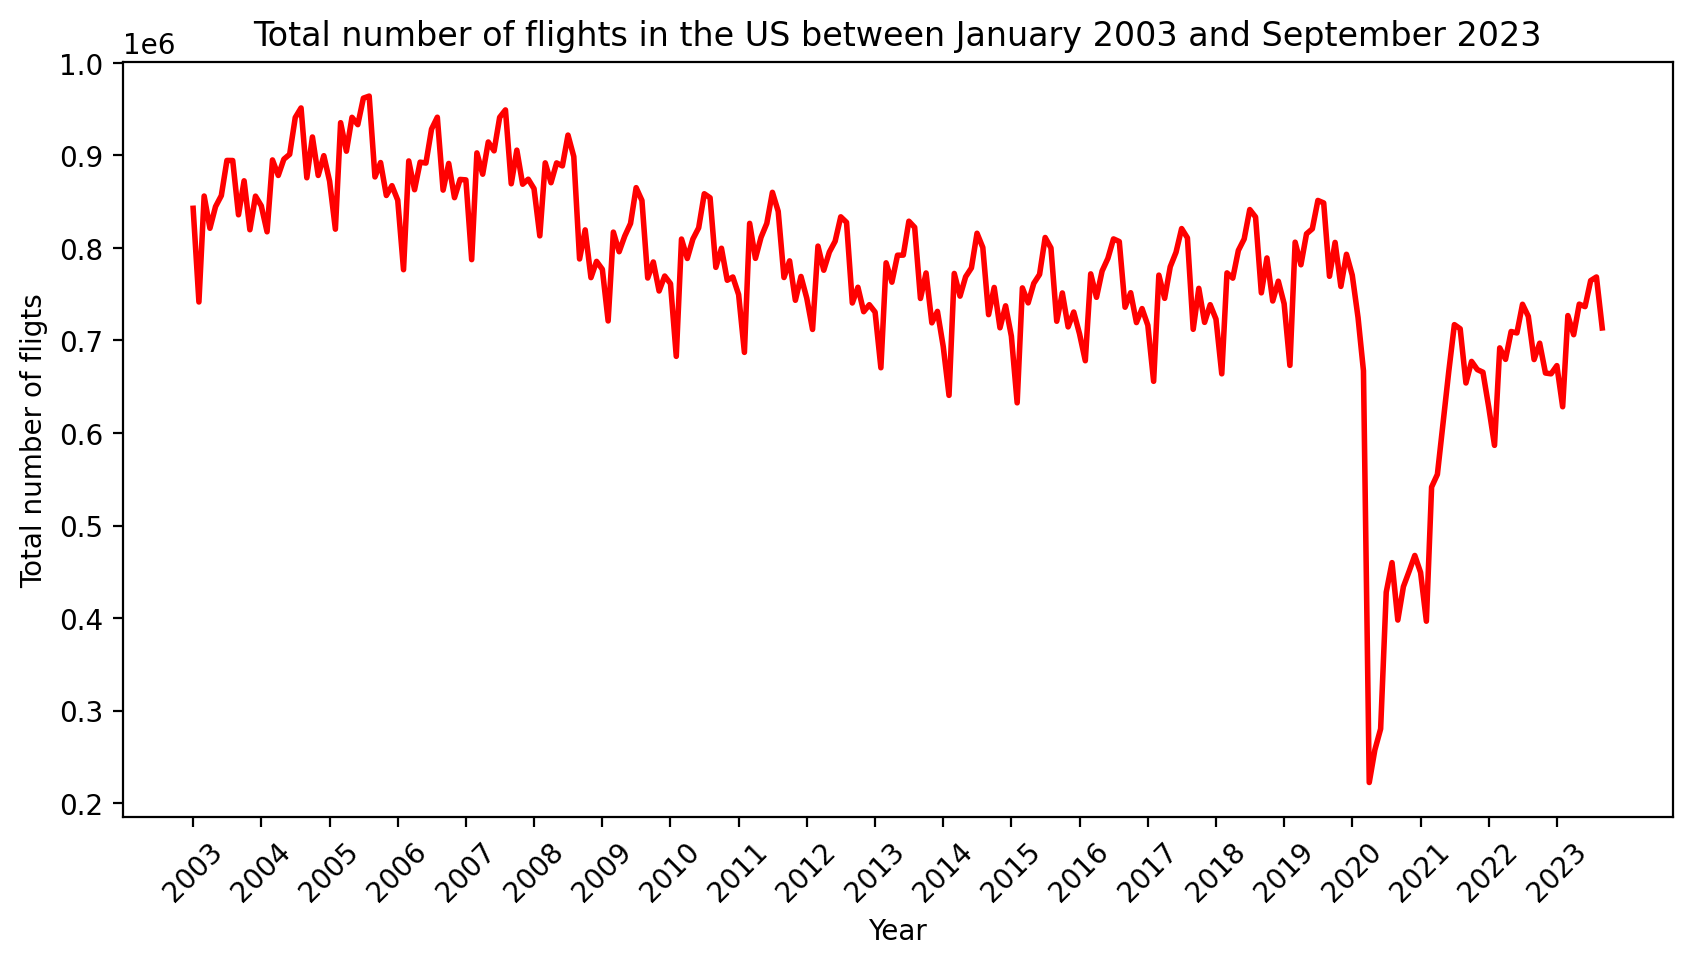

In [18]:
#Plotting the data

plt.figure(dpi=200,figsize=(10,5))
plt.plot(time_series.index,time_series['Flt number'],color='r',lw=2)
plt.xlabel("Year")
plt.ylabel("Total number of fligts")
plt.title('Total number of flights in the US between January 2003 and September 2023')
plt.xticks(time_series.index[::12], [date.strftime('%Y') for date in time_series.index[::12]],rotation=45)
plt.savefig('Time Series.png')
plt.show()

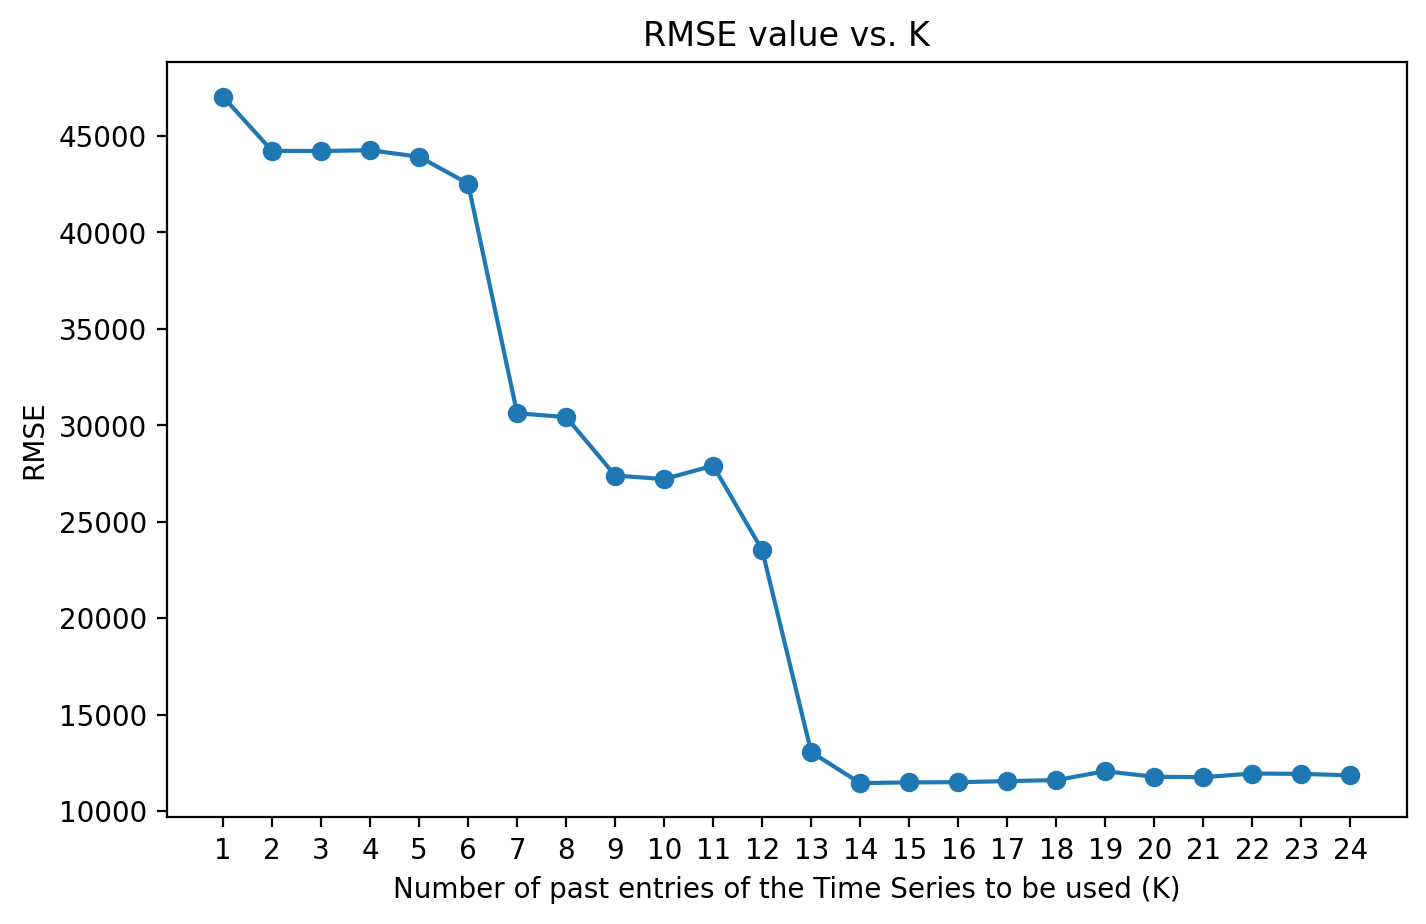

In [20]:
# Here we split the data for samples between January 2023 and December 2019 to be used for training and validation,
# adopting a 80-20 holdout strategy. For the test set we use the remaining data from December 2019 to September 2023.
# We then keep track of RMSE error in order to determine the best value of K, which represents how many past entries in the 
# series will be used for the prediction.

from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_validation = time_series[(time_series.index >= datetime(2003,1,1)) & (time_series.index <= datetime(2019,12,1))]

rmse_values = []

for k in range(1,25):
    # Shifting the Time series based on the value of K
    X = pd.concat([train_validation.shift(i) for i in range(k-1,-1,-1)],axis=1).iloc[:-1].dropna().values
    Y = train_validation[k:].values
    
    split_index = int(0.8 * len(X))
    X_train, X_validation = X[:split_index], X[split_index:]
    Y_train, Y_validation = Y[:split_index], Y[split_index:]

    model = LinearRegression()
    model.fit(X_train,Y_train)
    
    Y_pred = model.predict(X_validation)
    
    rmse = np.sqrt(mean_squared_error(Y_validation,Y_pred))
    rmse_values.append(rmse)
    
plt.figure(dpi=200,figsize=(8,5))
plt.plot(range(1,25), rmse_values, marker='o')
plt.xlabel('Number of past entries of the Time Series to be used (K)')
plt.ylabel('RMSE')
plt.title('RMSE value vs. K')
plt.xticks(range(1,25))
plt.savefig("RMSE vs K.png")
plt.show()

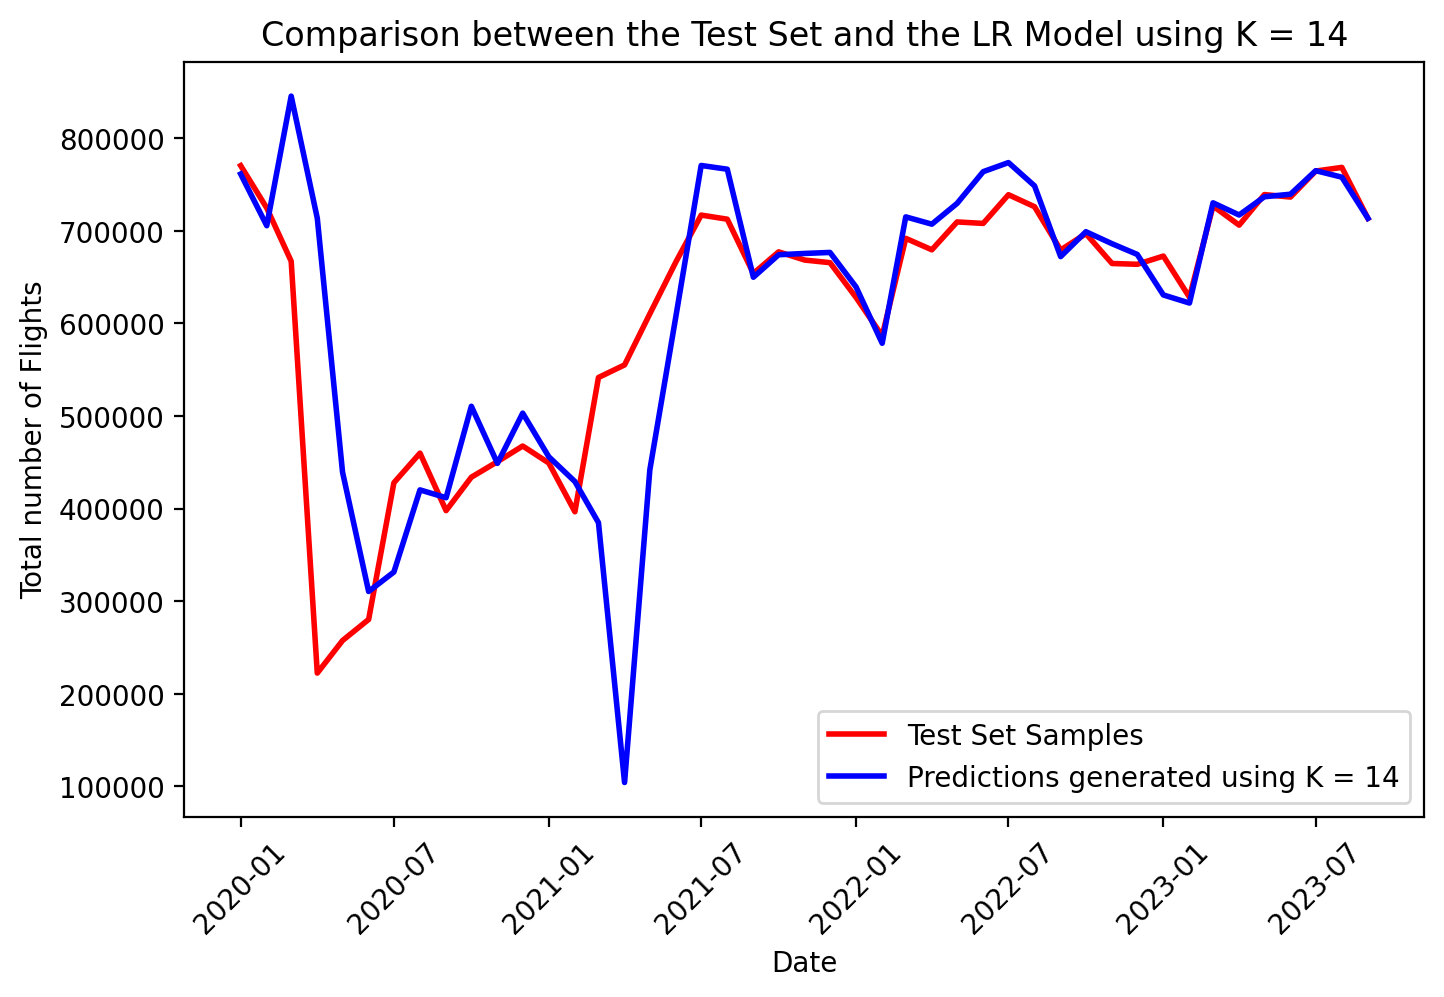

In [22]:
# Here we compare the predicitions generated by the best value of K to the data from the Test Set.
# We also calculate the RMSE and the MAPE error for the Test Set.

from sklearn.metrics import mean_absolute_percentage_error

k=14

test = time_series[time_series.index >= (datetime(2020,1,1) + pd.DateOffset(months=-k))]

X_train = pd.concat([train_validation.shift(i) for i in range(k-1,-1,-1)],axis=1).iloc[:-1].dropna().values
Y_train = train_validation[k:].values

X_test = pd.concat([test.shift(i) for i in range(k-1,-1,-1)],axis=1).iloc[:-1].dropna().values
Y_test = test[k:].values
    
model = LinearRegression()
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
mape = mean_absolute_percentage_error(Y_test,Y_pred)

plt.figure(dpi=200,figsize=(8,5))
plt.plot(test[k:].index, test[k:]['Flt number'], color='r', lw=2, label='Test Set Samples')
plt.plot(test[k:].index, Y_pred, color='b', lw=2, label='Predictions generated using K = 14')
plt.xlabel("Date")
plt.ylabel("Total number of Flights")
plt.title('Comparison between the Test Set and the LR Model using K = 14')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('Test Samples with the best K.png')
plt.show()

In [23]:
print("RMSE for the Test Set: {:.2e}".format(rmse))
print("MAPE for the Test Set: {:.1%}".format(mape))

RMSE for the Test Set: 1.16e+05
MAPE for the Test Set: 13.7%


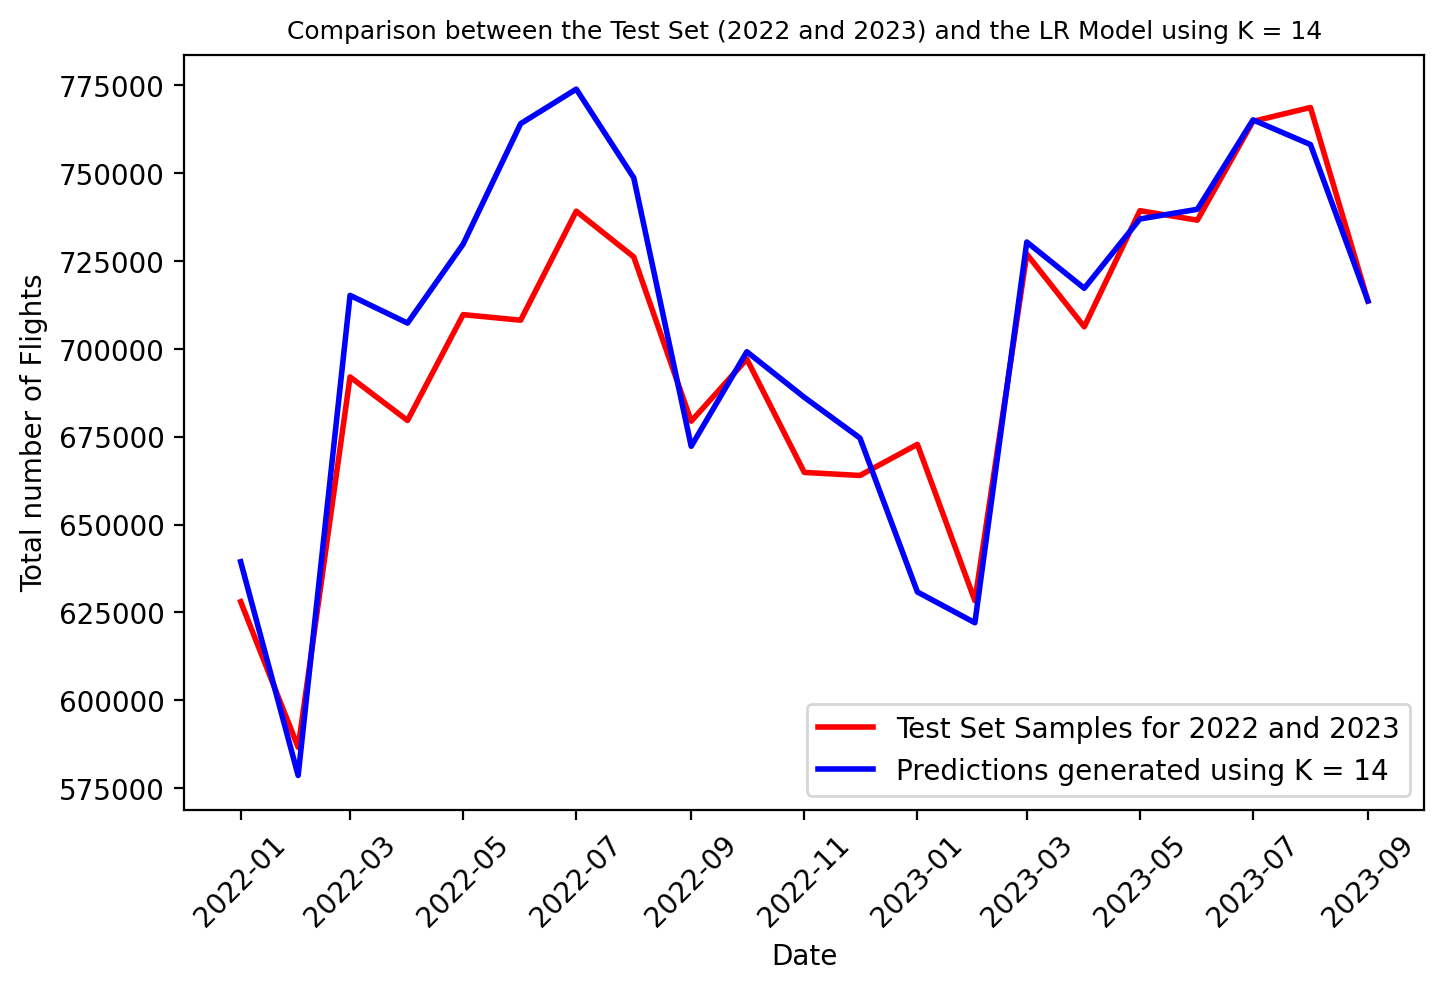

In [24]:
# Here we compare the predicitions generated by the best value of K to the data from the Test Set excluding the 
# coronavirus pandemic period (2020 and 2021). We also calculate the RMSE and the MAPE error for this subset of the Test Set.

k=14

test = time_series[time_series.index >= (datetime(2022,1,1) + pd.DateOffset(months=-k))]
X_test = pd.concat([test.shift(i) for i in range(k-1,-1,-1)],axis=1).iloc[:-1].dropna().values
Y_test = test[k:].values
Y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
mape = mean_absolute_percentage_error(Y_test,Y_pred)
plt.figure(dpi=200,figsize=(8,5))
plt.plot(test[k:].index, test[k:]['Flt number'], color='r', lw=2, label='Test Set Samples for 2022 and 2023')
plt.plot(test[k:].index, Y_pred, color='b', lw=2, label='Predictions generated using K = 14')
plt.xlabel("Date")
plt.ylabel("Total number of Flights")
plt.title('Comparison between the Test Set (2022 and 2023) and the LR Model using K = 14', fontsize=9)
plt.xticks(rotation=45)
plt.legend()
plt.savefig('Test samples with the best K for 2022 and 2023.png')
plt.show()

In [25]:
print("RMSE for the Test Set (2022 and 2023): {:.2e}".format(rmse))
print("MAPE for the Test Set (2022 and 2023): {:.1%}".format(mape))

RMSE for the Test Set (2022 and 2023): 2.12e+04
MAPE for the Test Set (2022 and 2023): 2.2%


In [26]:
# Here we split the data as the following:
# Training - Samples between January 2023 and December 2019
# Validation - Coronavirus Pandemic Period (2020 and 2021)
# Test - Samples between January 2022 and September 2023
train = time_series[(time_series.index >= datetime(2003,1,1)) & (time_series.index <= datetime(2019,12,1))]

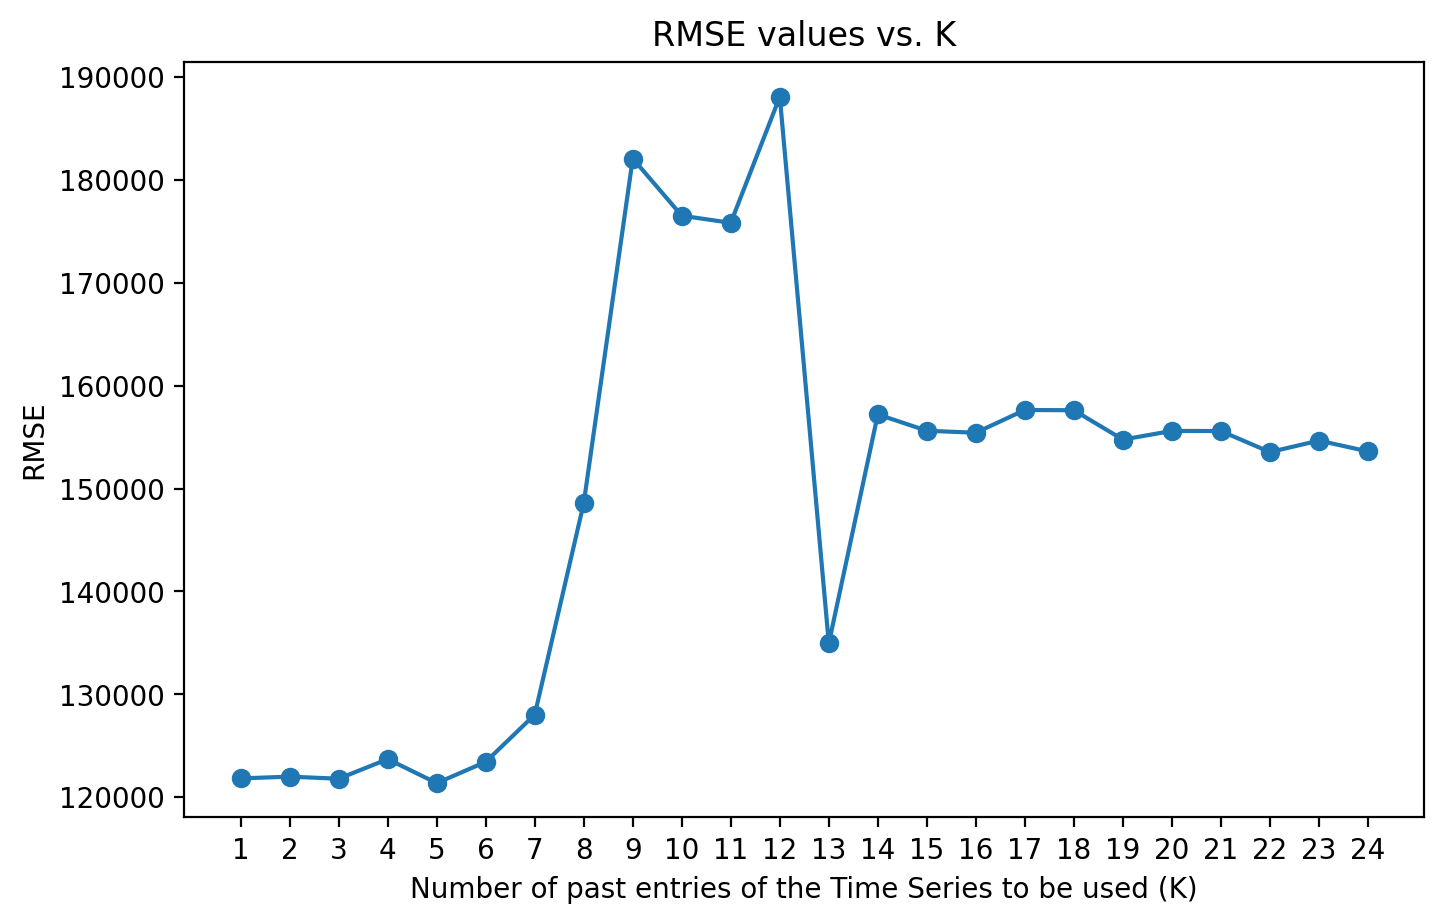

In [29]:
# We follow the same logic from before, training the data and using the Validation Set to determine the best value of K.

rmse_values = []

for k in range(1,25):
    X_train = pd.concat([train.shift(i) for i in range(k-1,-1,-1)],axis=1).iloc[:-1].dropna().values
    Y_train = train[k:].values
    
    validation = time_series[(time_series.index >= (datetime(2020,1,1) + pd.DateOffset(months=-k))) & (time_series.index <= datetime(2021,12,1))]
    X_validation = pd.concat([validation.shift(i) for i in range(k-1,-1,-1)],axis=1).iloc[:-1].dropna().values
    Y_validation = validation[k:].values

    model = LinearRegression()
    model.fit(X_train,Y_train)
    
    Y_pred = model.predict(X_validation)
    
    rmse = np.sqrt(mean_squared_error(Y_validation,Y_pred))
    rmse_values.append(rmse)
    
plt.figure(dpi=200,figsize=(8,5))
plt.plot(range(1,25), rmse_values, marker='o')
plt.xlabel('Number of past entries of the Time Series to be used (K)')
plt.ylabel('RMSE')
plt.title('RMSE values vs. K')
plt.xticks(range(1,25))
plt.savefig("RMSE vs K v2.png")
plt.show()

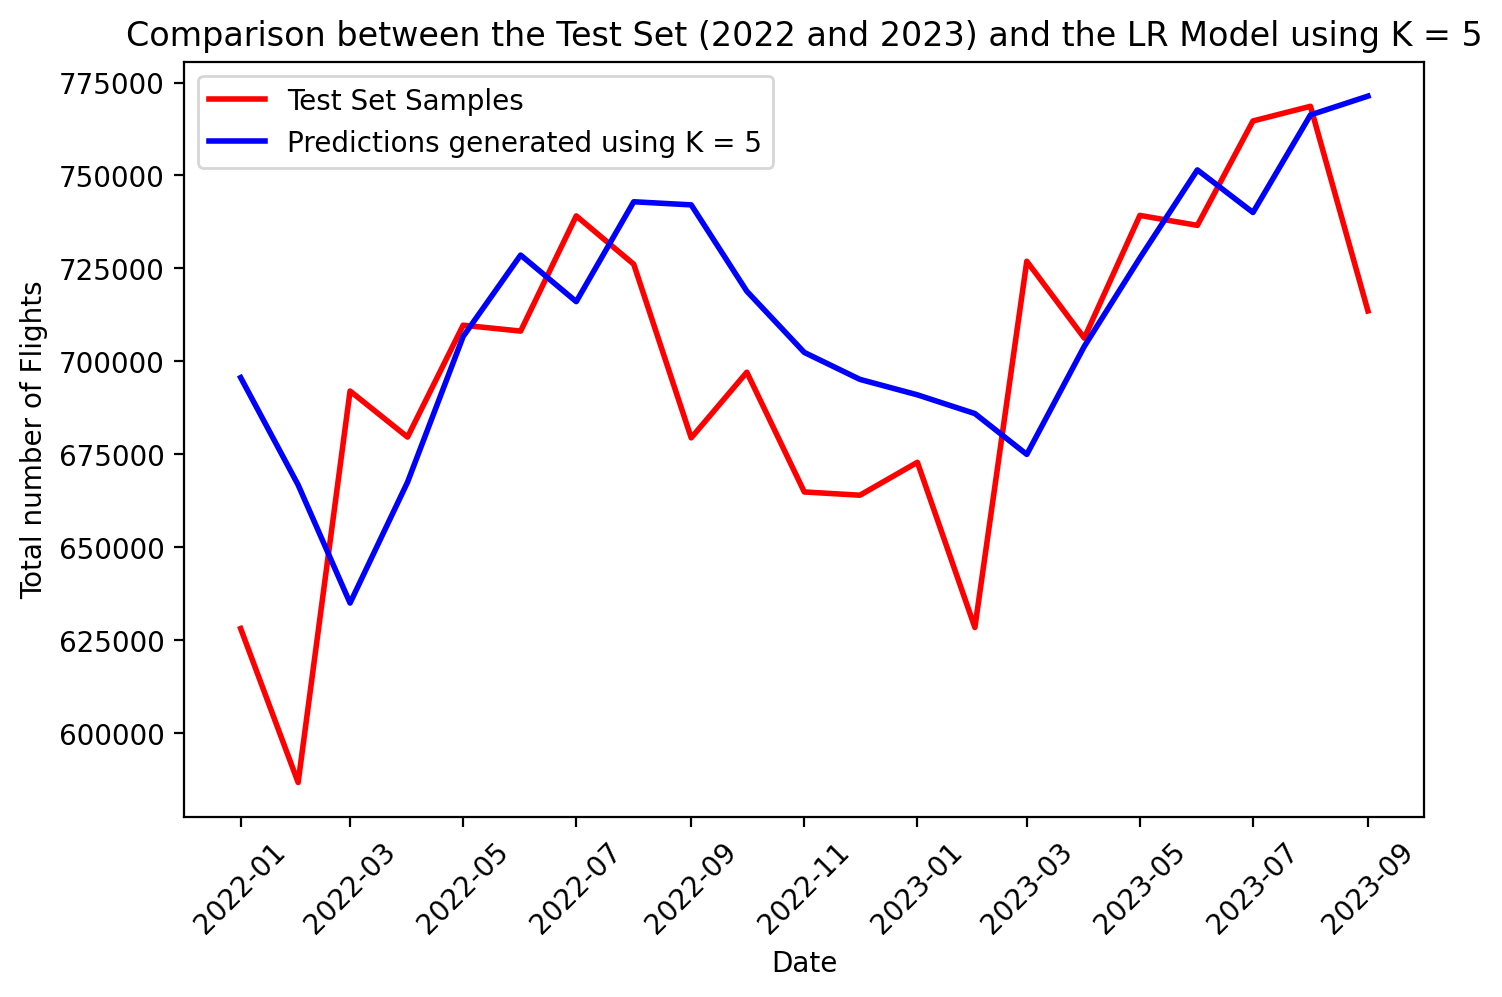

In [30]:
# Using the best value of K, we compare the predictions generated by the model to the Test Set (2022 and 2023)
# and also calculate its RMSE and MAPE errors.

k=5

X_train = pd.concat([train.shift(i) for i in range(k-1,-1,-1)],axis=1).iloc[:-1].dropna().values
Y_train = train[k:].values

test = time_series[time_series.index >= (datetime(2022,1,1) + pd.DateOffset(months=-k))]

X_test = pd.concat([test.shift(i) for i in range(k-1,-1,-1)],axis=1).iloc[:-1].dropna().values
Y_test = test[k:].values
    
model = LinearRegression()
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
mape = mean_absolute_percentage_error(Y_test,Y_pred)

plt.figure(dpi=200,figsize=(8,5))
plt.plot(test[k:].index, test[k:]['Flt number'], color='r', lw=2, label='Test Set Samples')
plt.plot(test[k:].index, Y_pred, color='b', lw=2, label='Predictions generated using K = {}'.format(k))
plt.xlabel("Date")
plt.ylabel("Total number of Flights")
plt.title('Comparison between the Test Set (2022 and 2023) and the LR Model using K = {}'.format(k))
plt.xticks(rotation=45)
plt.legend()
plt.savefig('Test samples with the best K for 2022 and 2023 v2.png')
plt.show()

In [31]:
print("RMSE for the Test Set: {:.2e}".format(rmse))
print("MAPE for the Test Set: {:.1%}".format(mape))

RMSE for the Test Set: 3.97e+04
MAPE for the Test Set: 4.8%
